# **라이브러리**

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore')

In [6]:
dataset = pd.read_csv(r'C:\Users\JH\Desktop\Final\Ubion-CorporateBankruptcyAnalysis\Data\최종데이터셋\Finaldataset_ver6.csv')
dataset.head(5)

,회사명,거래소코드,회계년도,소속코드,상장폐지일,감사의견코드,자기자본배당률,금융비용 대 부채비율,자기자본배율,유동부채비율,...,key,부도,공시발생일,정기공시제목,수시공시제목,대표이사 변경,최대주주 변경,회계처리위반,횡령배임,폐지사유요약합본
0,(주)CMG제약,58820.0,2000/12,5.0,0,UQ,0.0,0.019074,179.37,131.99,...,588202001,1.0,0,0,0,0.0,0.0,0.0,0.0,['N']
1,(주)CMG제약,58820.0,2001/12,5.0,0,UQ,0.0,0.023517,179.37,131.99,...,588202002,1.0,0,0,0,0.0,0.0,0.0,0.0,['N']
2,(주)CMG제약,58820.0,2002/12,5.0,0,UQ,0.0,0.043081,133.37,132.37,...,588202003,1.0,0,0,0,1.0,0.0,0.0,0.0,['N']
3,(주)CMG제약,58820.0,2003/12,5.0,0,UQ,0.0,0.058531,131.30,71.46,...,588202004,1.0,0,0,0,1.0,0.0,0.0,0.0,['N']
4,(주)CMG제약,58820.0,2004/12,5.0,0,UQ,0.0,0.047346,52.25,101.56,...,588202005,1.0,0,0,0,1.0,0.0,0.0,0.0,['N']


In [12]:
dataset.loc[dataset['부도'] == 0][['감사의견코드','정기공시제목','수시공시제목','폐지사유요약합본']]

,감사의견코드,정기공시제목,수시공시제목,폐지사유요약합본
119,UQ,0,상장폐지,['기업의 계속성 및 경영의 투명성 등을 종합적으로 고려하여 상장폐지 기준에 해당한...
174,UQ,0,상장폐지,"['기업의 계속성, 경영의 투명성 또는 기타 코스닥시장의 건전성 등을 종합적으로 고..."
352,UQ,0,상장폐지,['주된 영업의 정지에 의한 상장폐지기준 해당']
572,UQ,파산신청,0,['N']
581,DU,0,상장폐지,['감사의견거절(감사범위제한)']
...,...,...,...,...
26320,NS,0,상장폐지승인,['감사의견거절 및 법정제출기한 익일로부터 30일이내에 사업보고서 미제출']
26341,UQ,0,상장폐지,['발행한 어음 또는 수표가 주거래은행에 의하여 최종부도로 결정되거나 거래은행에 의...
26581,DS,0,상장폐지,['감사범위제한으로 인한 감사의견거절']
26688,UQ,0,상장폐지,['최종부도(상장폐지사유 발생일 : 2005년 04월 25일)']


In [18]:
dataset.loc[(dataset['부도'] == 0) & (dataset['정기공시제목'] != '0')]['정기공시제목'].value_counts()

회생절차개시신청                            22
내부결산시점 관리종목 지정 또는 상장폐지 사유 발생        18
[정정]내부결산시점 관리종목 지정 또는 상장폐지 사유 발생     9
회생절차개시결정                             8
부도발생                                 8
파산신청                                 6
내부결산시점 관리종목 지정 또는 상장폐지 사유 발생[정]      6
파산신청 기각                              4
화의채무변제완료보고서제출                        3
[정정]회생절차개시신청                         3
[정정]회생절차개시결정                         2
회생절차 종결결정                            1
Name: 정기공시제목, dtype: int64

In [7]:
cpy_delisting = pd.Series(dataset.loc[dataset['소속코드'] == 4]['회사명'].unique()) # 상장폐지

cpy_dftall = pd.Series(dataset.loc[(dataset['부도'] == 0) & 
((dataset['감사의견코드'] == 'DS') | (dataset['감사의견코드'] == 'DU') | (dataset['감사의견코드'] == 'AG') | (dataset['감사의견코드'] == 'DI') | (dataset['감사의견코드'] == 'QS')
| (dataset['공시제목'] != '0'))]['회사명'].unique()) # 상장폐지 中 부도 사유 발생

cpy_dftetc = pd.Series(dataset.loc[(dataset['공시제목'] != '0') & (dataset['부도'] == 0)]['회사명'].unique()) # 상장폐지 中 감사의견을 제외한 부도 사유

dft_dtfgamsa = pd.Series(dataset.loc[(dataset['부도'] == 0) & # 상장폐지 中 감사으견에 의한 부도
((dataset['감사의견코드'] == 'DS') | (dataset['감사의견코드'] == 'DU') | (dataset['감사의견코드'] == 'AG') | (dataset['감사의견코드'] == 'DI') | (dataset['감사의견코드'] == 'QS'))]['회사명'].unique())

In [8]:
print('상장폐지 기업 수 : {num}'.format(num = len(cpy_delisting)))
print('부도 사유 발생 기업 수: {num}'.format(num = len(cpy_dftall)))
print('감사의견 부적정으로 인한 부도 발생 기업 수: {num}'.format(num = len(dft_dtfgamsa)))
print('공시 사유로 인한 부도 발생 기업 수 : {num}'.format(num = len(cpy_dftetc)))

상장폐지 기업 수 : 599
부도 사유 발생 기업 수: 282
감사의견 부적정으로 인한 부도 발생 기업 수: 250
공시 사유로 인한 부도 발생 기업 수 : 93


In [21]:
x = ['상장폐지','부도 발생', '감사의견 부적정', '공시 사유로 인한 부도']
height = [599,282,250,93]

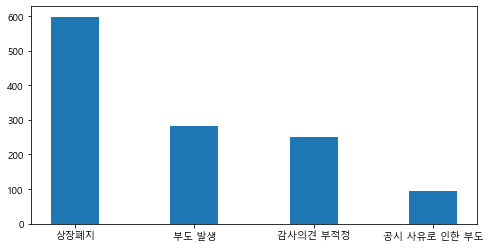

In [28]:
plt.rcParams['font.family'] = 'malgun gothic'
plt.rcParams['figure.figsize'] = (8,4)
plt.bar(x = x, height=height, width=0.4)
plt.show()

In [9]:
cpy_delisting.isin(cpy_dftall) # False : 상폐지만 부도 X True 상폐면서 부도

data = {'회사명' : cpy_delisting ,'BANKRUPTY' :cpy_delisting.isin(cpy_dftall)}
subset2 = pd.DataFrame(data)
subset2

,회사명,BANKRUPTY
0,(주)강원랜드,False
1,(주)경윤하이드로에너지,False
2,(주)골드카운티,False
3,(주)굿이엠지,False
4,(주)그로웰텔레콤,False
...,...,...
594,한주금속(주),False
595,해원에스티(주),True
596,현대정보기술(주),False
597,현주컴퓨터(주),False


In [10]:
subset2.loc[subset2['BANKRUPTY'] == False]

,회사명,BANKRUPTY
0,(주)강원랜드,False
1,(주)경윤하이드로에너지,False
2,(주)골드카운티,False
3,(주)굿이엠지,False
4,(주)그로웰텔레콤,False
...,...,...
593,한솔신텍(주),False
594,한주금속(주),False
596,현대정보기술(주),False
597,현주컴퓨터(주),False
